In [1]:
pip install prophet


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 1.4 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/13.3 MB 1.5 MB/s eta 0:00:09
   --- ------------------------------------ 1.3/13.3 MB 1.5 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/13.3 MB 1.5 MB/s eta 0:00:08
   ----- ---------------------------------- 1.8/13.3 MB 1.5 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/13.3 MB 1.5 MB/s eta 0:00:08
   ------- -------------------------------- 2.6/13.3 MB 1.5 MB/s eta 0:00:08
   -------- ------------------------------- 2.9/13.3 MB 1.5 MB/s eta 0:00:07
   --------- ------------------------------ 3.1/13.3 MB 1.5 MB/s eta 0:00:07
   ---------- ----------------------------- 3.4/13.3 MB 1.5 MB/s eta 0:00:07
   ----------- ----

09:52:27 - cmdstanpy - INFO - Chain [1] start processing
09:52:27 - cmdstanpy - INFO - Chain [1] done processing


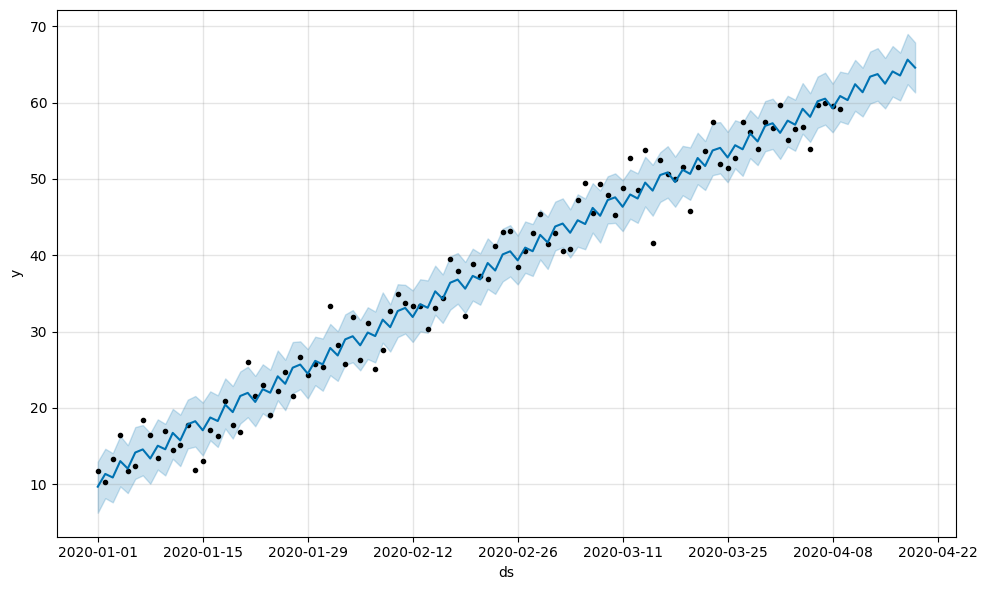

In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
trend = np.linspace(10, 50, 100)  # Tendencia lineal
seasonality = 10 * np.sin(2 * np.pi * dates.dayofyear / 365.25)  # Estacionalidad anual
noise = np.random.normal(scale=3, size=100)  # Ruido aleatorio
y = trend + seasonality + noise

# Crear DataFrame en formato Prophet
df = pd.DataFrame({'ds': dates, 'y': y})

# Crear y ajustar modelo Prophet
model = Prophet()
model.fit(df)

# Hacer pronóstico para 30 días futuros
future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

# Graficar resultados
fig = model.plot(forecast)
plt.show()
